Index(['CustomerID', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn', 'Country', 'State', 'City',
       'Gender', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', 'Age',
       'Under 30', 'Married', 'Dependents', 'Number of Dependents',
       'total services', 'high_churn_score', 'low_churn_score'],
      dtype='object')
-0.035082245951772305
      CustomerID  Partner Dependents  Tenure  Phone Service  Multiple Lines  \
2     3668-QPYBK        0          0       2              1               0   
4     9237-HQITU        0          0       2              1               0   
5     9305-CDSKC        0          0       8              1               1   
8     7892-POOKP        1          0      28             

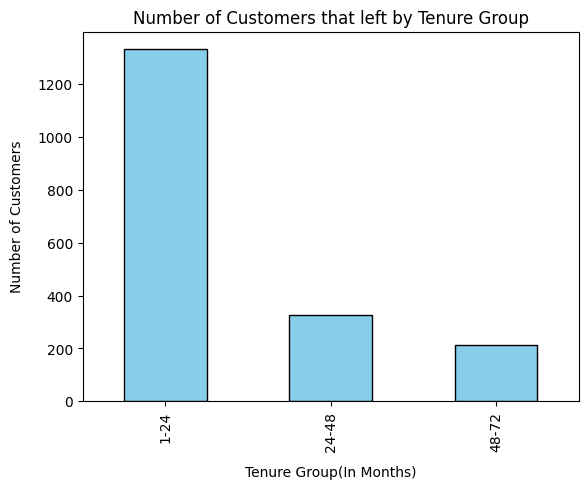

tenure_group
(0.929, 24.667]     447
(24.667, 48.333]     98
(48.333, 72.0]       76
Name: CustomerID, dtype: int64


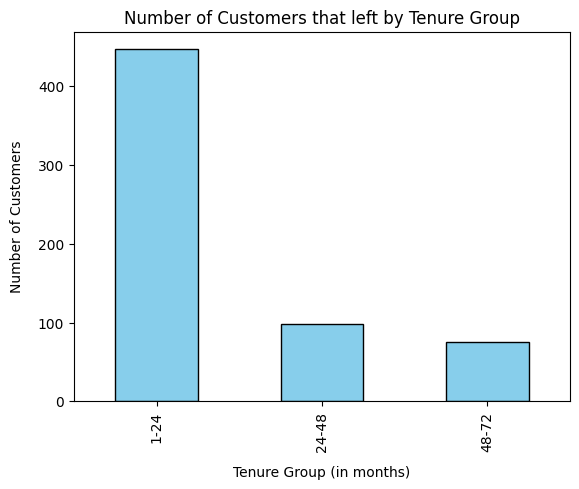

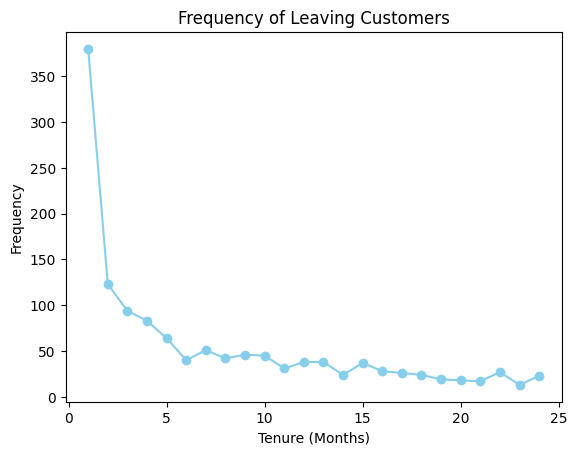

24
      CustomerID  Partner Dependents  Tenure  Phone Service  Multiple Lines  \
2     3668-QPYBK        0          0       2              1               0   
4     9237-HQITU        0          0       2              1               0   
5     9305-CDSKC        0          0       8              1               1   
18    4190-MFLUW        1          1      10              1               0   
20    8779-QRDMV        0          0       1              0               0   
...          ...      ...        ...     ...            ...             ...   
7018  1122-JWTJW        1          1       1              1               0   
7021  1699-HPSBG        0          0      12              1               0   
7026  8775-CEBBJ        0          0       9              1               0   
7032  6894-LFHLY        0          0       1              1               1   
7041  8361-LTMKD        1          0       4              1               1   

     Internet Service  Online Security  Online B

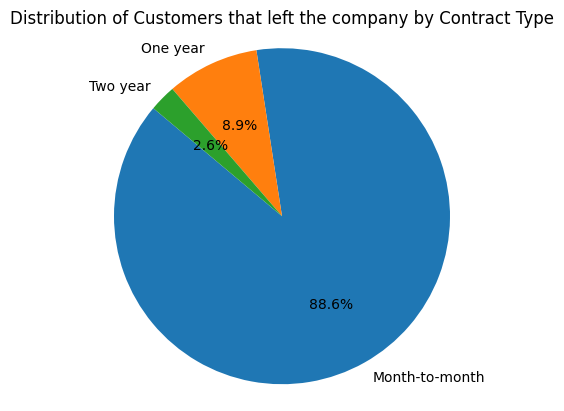

age_group
19-40    1849
40-60    1773
60-80    1541
Name: CustomerID, dtype: int64
tenure_group
(0.929, 24.667]     1868
(24.667, 48.333]    1269
(48.333, 72.0]      2026
Name: CustomerID, dtype: int64
City
Los Angeles      90
San Diego        50
San Francisco    31
San Jose         29
Sacramento       26
                 ..
King City         1
Kernville         1
Kerman            1
Joshua Tree       1
Zenia             1
Name: CustomerID, Length: 833, dtype: int64
City
Los Angeles      304
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Pescadero          4
Ben Lomond         3
Independence       3
Cupertino          3
Redcrest           3
Name: count, Length: 1129, dtype: int64
0.24900455062571103
50.10149138098005


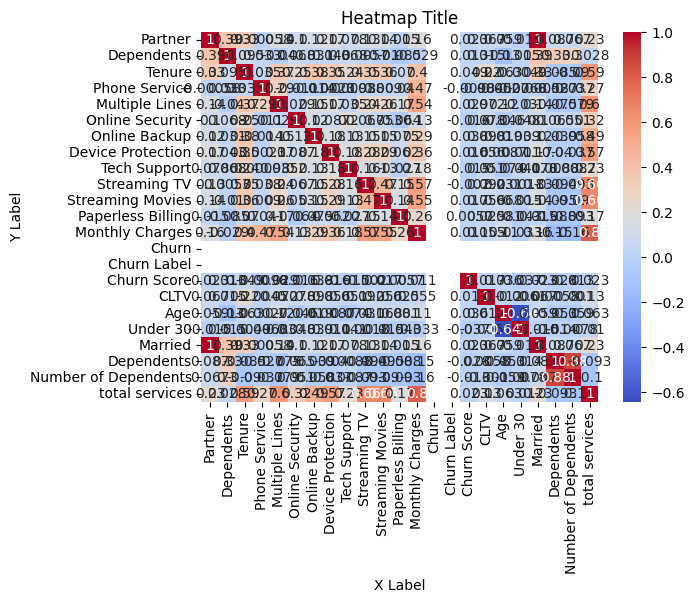

0.6649697819859556
0.24900455062571103
50.10149138098005
0.26578498293515357
Under 30
0    598
1    159
Name: CustomerID, dtype: int64


Text(0, 0.5, 'Number of Customers')

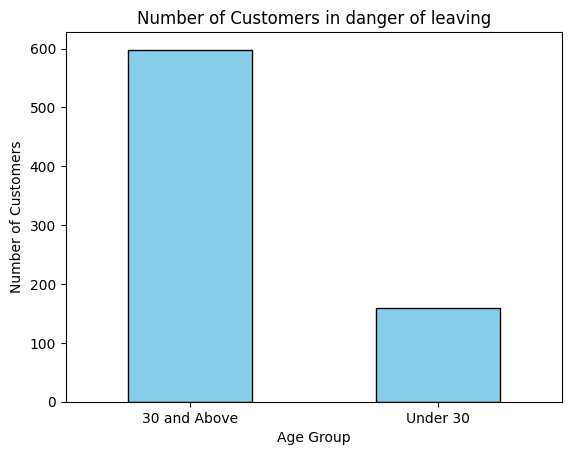

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv(r"/Users/mathiasankri/Documents/Final project data analyst churn/archive/CustomerChurn.csv")
df2 = pd.read_csv(r"/Users/mathiasankri/Documents/Final project data analyst churn/archive/Telco_customer_churn.csv")
df3 = pd.read_excel(r"/Users/mathiasankri/Documents/Final project data analyst churn/archive/Telco_customer_churn_demographics.xlsx")
# Strip whitespace from column names
df1.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

df2.columns = df2.columns.str.strip()
df3.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
# Merge DataFrames on 'Customer ID' column
merged_df = pd.merge(df1, df2, on='CustomerID')
final_df = pd.merge(merged_df, df3, on='CustomerID')

#Changing "yes" to 1 and "No" to 0
final_df.replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}, inplace=True)


duplicated_columns = final_df.columns[final_df.columns.duplicated()].tolist()

# Drop duplicated columns
final_df = final_df.drop(columns=duplicated_columns)
duplicated_columns_to_drop = ['Senior Citizen_y', 'Partner_y', 'Dependents_y', 'Phone Service_y',
                               'Multiple Lines_y', 'Internet Service_y', 'Online Security_y',
                               'Online Backup_y', 'Device Protection_y', 'Tech Support_y',
                               'Streaming TV_y', 'Streaming Movies_y', 'Contract_y',
                               'Paperless Billing_y', 'Payment Method_y', 'Monthly Charges_y',
                               'Total Charges_y', 'Gender_y', 'Count_y']

# Drop duplicated columns
final_df = final_df.drop(columns=duplicated_columns_to_drop)

# print(final_df.columns)

columns = ['LoyaltyID', 'CustomerID', 'Senior Citizen_x', 'Partner_x',
       'Dependents_x', 'Tenure', 'Phone Service_x', 'Multiple Lines_x',
       'Internet Service_x', 'Online Security_x', 'Online Backup_x',
       'Device Protection_x', 'Tech Support_x', 'Streaming TV_x',
       'Streaming Movies_x', 'Contract_x', 'Paperless Billing_x',
       'Payment Method_x', 'Monthly Charges_x', 'Total Charges_x', 'Churn',
       'Count_x', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender_x', 'Tenure Months', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents']




final_df.columns = final_df.columns.str.replace('_x', '')
# print(final_df.columns)


#droping not need columns and filtering columns
new_df = final_df.drop(columns=['Zip Code','Lat Long','Latitude','Longitude','Count','LoyaltyID','Tenure Months','Senior Citizen','Churn Value'])
new_df = new_df[new_df['Age'] > 18]
new_df = new_df[new_df['Tenure']>0]
# print(new_df.columns)









#

#work on churn reason groups

# print(new_df.columns)
# print(sort_leaving_groups)
new_df['Churn Reason'] = new_df['Churn Reason'].str.split().str[0]
new_df['total services'] = new_df['Phone Service']+new_df['Online Security']+new_df['Online Backup']+new_df['Device Protection']+new_df['Streaming TV']+new_df['Streaming Movies']+new_df['Multiple Lines']
new_df['high_churn_score'] = new_df['Churn Score']>75
new_df['low_churn_score'] = new_df['Churn Score']<75
leaving_groups = new_df.groupby('Churn Reason')['CustomerID'].size()
sort_leaving_groups = leaving_groups.sort_values(ascending=False)
# print(sort_leaving_groups)
print(new_df.columns)

# print(new_df['total services'].sort_values(ascending=False))
new_df['tenure_group'] = pd.cut(new_df['Tenure'], 3, labels=None)
group_labels = ['19-40','40-60','60-80']
new_df['age_group'] = pd.qcut(new_df['Age'], 3, labels=group_labels)

compotiter_leave = new_df[new_df['Churn Reason']=='Competitor']



#checking corr
correlation = new_df['total services'].corr(new_df['Churn'])
print(correlation)

#qcut the compotitor_leave
print(new_df[new_df['Churn']==1])
left_customers = new_df[new_df['Churn']==1]
group_labels = ['19-40','40-60','60-80']


a = left_customers.groupby('age_group')['CustomerID'].size()
b = compotiter_leave.groupby('age_group')['CustomerID'].size()


c = left_customers.groupby('tenure_group')['CustomerID'].size()
print(c)
c.index = ['1-24', '24-48', '48-72']

# Plot the bar graph
ax = c.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Number of Customers that left by Tenure Group')
plt.xlabel('Tenure Group(In Months)', labelpad=10)  # Adjust the labelpad as needed
plt.ylabel('Number of Customers', labelpad=10)  # Adjust the labelpad as needed

# Show the plot
plt.show()





d = compotiter_leave.groupby('tenure_group')['CustomerID'].size()
print(d)
d.index = ['1-24', '24-48', '48-72']

# # Plot the bar graph
# ax = d.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Number of Customers that left by Tenure Group')
plt.xlabel('Tenure Group (in months)', labelpad=10)  # Adjust the labelpad as needed
plt.ylabel('Number of Customers', labelpad=10)  # Adjust the labelpad as needed

# Show the plot
plt.show()

compotiter_leave = new_df[new_df['Churn Reason']=='Competitor']
max_2years_tenure = left_customers[left_customers['Tenure']<=24]
leaving_frequency = max_2years_tenure['Tenure'].value_counts().sort_index()

# Plot the line graph
leaving_frequency.plot(kind='line', marker='o', color='skyblue')

# Set the title and labels
plt.title('Frequency of Leaving Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

print(max_2years_tenure['Tenure'].max())
print(max_2years_tenure)
group_by_contract_max2 = max_2years_tenure.groupby('Contract')['CustomerID'].size()
print(group_by_contract_max2)

group_by_contract = left_customers.groupby('Contract')['CustomerID'].size()
print(group_by_contract)
group_by_contract.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers that left the company by Contract Type')
plt.ylabel('')  # Remove the default 'CustomerID' label on the y-axis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Main conclusion :
# 86% from all the customers that left the company signed "Month-to-month" contract.
#  72% from all the customers that left the company are in the the 1-24 tenure group.


still_in_comp_df = new_df[new_df['Churn']==0]
amount_customers_by_age = still_in_comp_df.groupby('age_group')['CustomerID'].size()
amount_customers_by_tenure = still_in_comp_df.groupby('tenure_group')['CustomerID'].size()
print(amount_customers_by_age)
print(amount_customers_by_tenure)



left_by_city = (left_customers.groupby('City')['CustomerID'].size()).sort_values(ascending=False)
print(left_by_city)
print(new_df['City'].value_counts())

print(new_df['high_churn_score'].sum()/new_df['CustomerID'].count())
print(still_in_comp_df['Churn Score'].mean())
# creating correlations

numeric_df = left_customers.select_dtypes(include=['number'])


corr_matrix = numeric_df.corr()

# Plot the heatmap using Plotly
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Heatmap Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()
correlation = new_df['Churn'].corr(new_df['Churn Score'])
print(correlation)

print(new_df['high_churn_score'].sum()/new_df['CustomerID'].count())
print(still_in_comp_df['Churn Score'].mean())
print(left_customers['CustomerID'].count()/new_df['CustomerID'].count())

# by the churn score preductive:
want_to_leave = still_in_comp_df[(still_in_comp_df['Churn Score'] > 70) & (still_in_comp_df['Churn Score'] < 80)]
staying_in_company = still_in_comp_df[(still_in_comp_df['Churn Score'] > 0) & (still_in_comp_df['Churn Score'] < 70)]


under30_check = want_to_leave.groupby('Under 30')['CustomerID'].size()
print(under30_check)



# Plot the bar graph
under30_check = under30_check.rename(index={True: 'Under 30', False: '30 and Above'})

# Plot the bar graph
ax = under30_check.plot(kind='bar', color='skyblue', edgecolor='black')

# Rotate x-axis labels by 180 degrees
plt.xticks(rotation=360)

# Set the title and labels
plt.title('Number of Customers in danger of leaving')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')


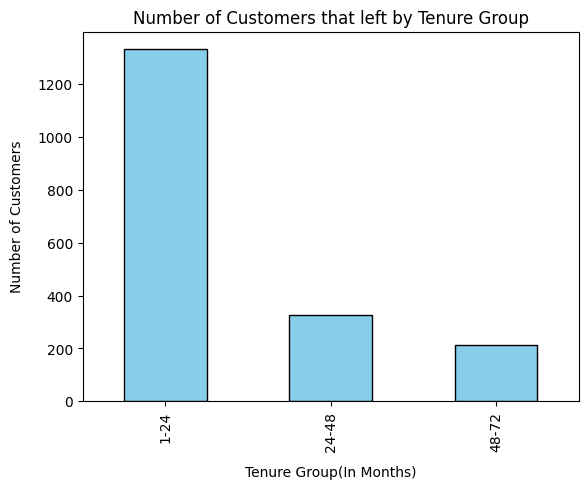

TypeError: 'module' object is not callable

In [7]:
left_customers = new_df[new_df['Churn']==1]
group_labels = ['19-40','40-60','60-80']


a = left_customers.groupby('age_group')['CustomerID'].size()
b = compotiter_leave.groupby('age_group')['CustomerID'].size()


c = left_customers.groupby('tenure_group')['CustomerID'].size()
# print(c)
c.index = ['1-24', '24-48', '48-72']

# Plot the bar graph
ax = c.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Number of Customers that left by Tenure Group')
plt.xlabel('Tenure Group(In Months)', labelpad=10)  # Adjust the labelpad as needed
plt.ylabel('Number of Customers', labelpad=10)  # Adjust the labelpad as needed

# Show the plot
plt.show()

plot(kind='line')
plt.xlabel('Tenure')
plt.ylabel('CustomerID')
plt.title('Number of Customers by Tenure Group')
plt.show()

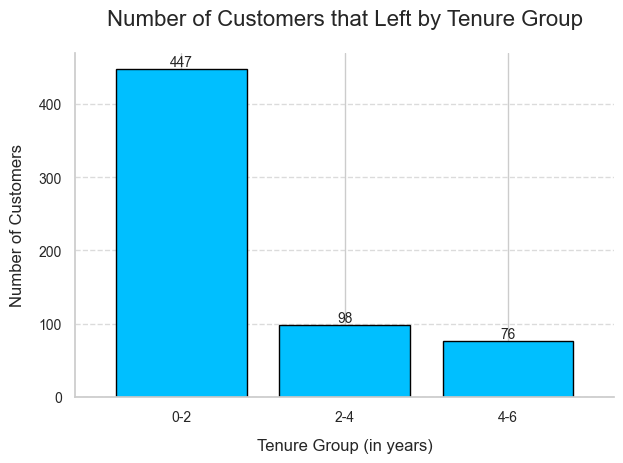

In [116]:

import matplotlib.pyplot as plt

# Sample data
d = compotiter_leave.groupby('tenure_group')['CustomerID'].size()
d.index = ['0-2', '2-4', '4-6']

# Define custom colors
colors = ['deepskyblue', 'deepskyblue', 'deepskyblue']

# Plot the bar graph
ax = d.plot(kind='bar', color=colors, edgecolor='black', width=0.8)  # Adjust the width as needed

# Add value labels on top of each bar with a slight offset
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center', va='bottom', fontsize=10)

# Set the title and labels
plt.title('Number of Customers that Left by Tenure Group', fontsize=16, pad=20)  # Adjust the title padding as needed
plt.xlabel('Tenure Group (in years)', fontsize=12, labelpad=10)  # Adjust the labelpad as needed
plt.ylabel('Number of Customers', fontsize=12, labelpad=10)  # Adjust the labelpad as needed

# Customize ticks and grid
plt.xticks(rotation=0, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines with transparency

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()




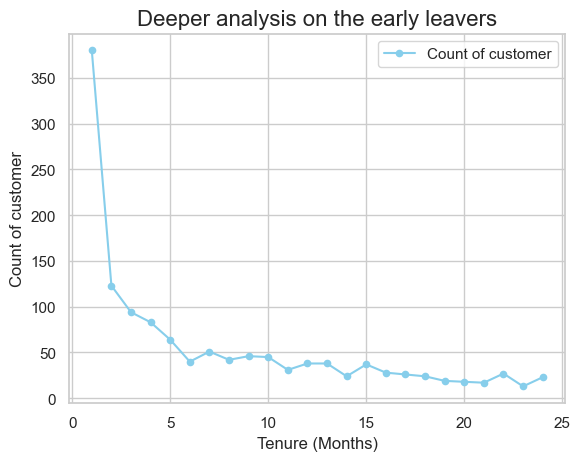

<Figure size 1000x600 with 0 Axes>

In [117]:
import matplotlib.pyplot as plt

# Assuming leaving_frequency is your DataFrame or Series
leaving_frequency.plot(kind='line', marker='.', color='skyblue')

# Set the title and labels with adjusted font sizes
plt.title('Deeper analysis on the early leavers', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count of customer', fontsize=12)

# Add grid lines
plt.grid(True)

# Change marker style and size
plt.setp(plt.gca().get_lines(), markersize=8, markeredgewidth=1.5)

# Add legend
plt.legend(['Count of customer'], loc='best')

# Show the plot with a larger figure size
plt.figure(figsize=(10, 6))

# Show the plot
plt.show()


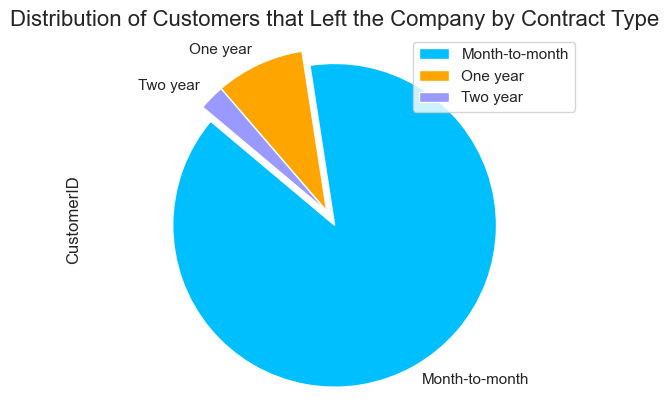

<Figure size 800x800 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

# Assuming group_by_contract is your Series containing the counts of customers that left by contract type
# Replace 'group_by_contract' with your actual data variable

# Sample data
# group_by_contract = left_customers.groupby('Contract')['CustomerID'].size()

# Define custom colors
colors = ['deepskyblue', 'orange', '#9999ff']  # Example colors, feel free to adjust

# Explode out a particular slice (e.g., the 'One year' contract)
explode = (0.1, 0, 0)

# Plot the pie chart
group_by_contract.plot.pie( startangle=140, colors=colors, explode=explode)

# Add a legend
plt.legend(group_by_contract.index, loc="best")

# Set the title
plt.title('Distribution of Customers that Left the Company by Contract Type', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot with a larger figure size
plt.figure(figsize=(8, 8))

# Show the plot
plt.show()



Text(0, 0.5, 'Number of Customers')

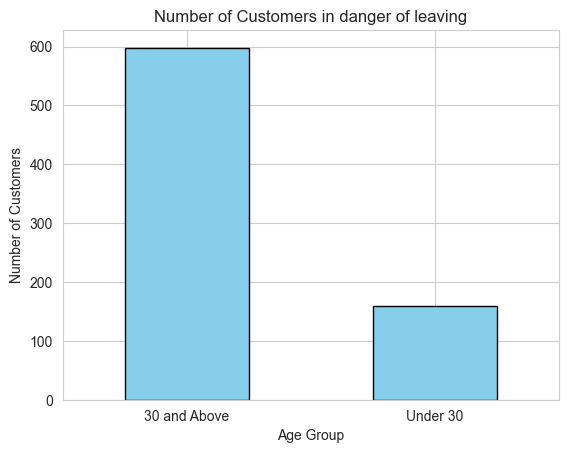

In [51]:
under30_check = under30_check.rename(index={True: 'Under 30', False: '30 and Above'})

# Plot the bar graph
ax = under30_check.plot(kind='bar', color='skyblue', edgecolor='black')

# Rotate x-axis labels by 180 degrees
plt.xticks(rotation=360)

# Set the title and labels
plt.title('Number of Customers in danger of leaving')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

<Axes: ylabel='Density'>

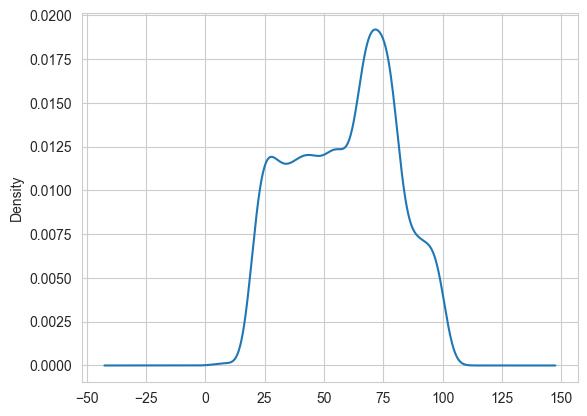

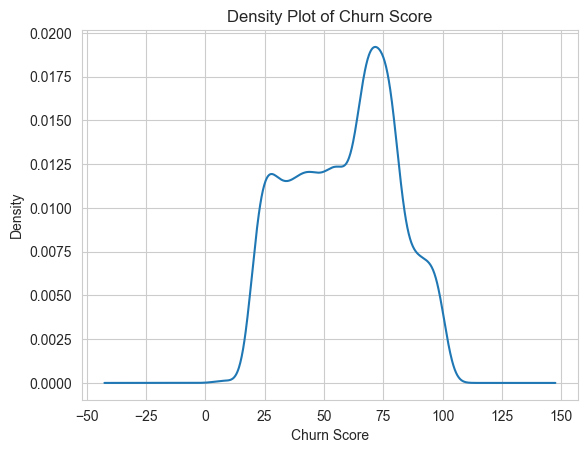

In [56]:
df2['Churn Score'].plot(kind='density')

# Set the title and labels
plt.title('Density Plot of Churn Score')
plt.xlabel('Churn Score')
plt.ylabel('Density')

# Show the plot
plt.show()


Density graph : entre churn score and churned 



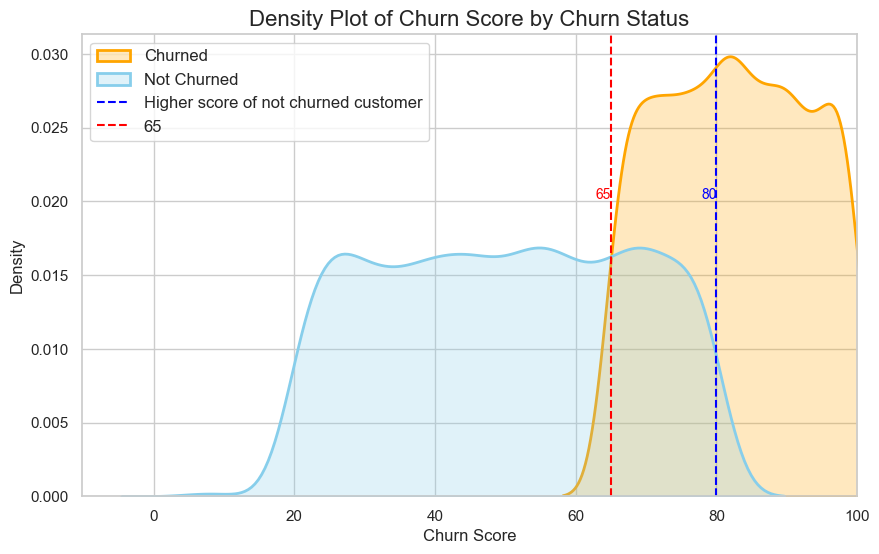

In [114]:
# Définir le style de seaborn
sns.set(style="whitegrid")

# Filtrer les scores de churn pour les clients qui ont churné et ceux qui ne l'ont pas fait
churn_score_1 = df2[df2['Churn Value'] == 1]['Churn Score']
churn_score_0 = df2[df2['Churn Value'] == 0]['Churn Score']

# Créer le graphique de densité
plt.figure(figsize=(10, 6))
sns.kdeplot(churn_score_1, color='orange', label='Churned', linewidth=2, fill=True)
sns.kdeplot(churn_score_0, color='skyblue', label='Not Churned', linewidth=2, fill=True)

# Ajouter des lignes verticales pour les valeurs de seuil
plt.axvline(x=80, color='blue', linestyle='--', label='Higher score of not churned customer')
plt.axvline(x=65, color='red', linestyle='--', label='65')

# # Ajouter des annotations pour les valeurs de seuil
# plt.text(75, 0.02, '75', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)
plt.text(80, 0.02, '80', verticalalignment='bottom', horizontalalignment='right', color='blue', fontsize=10)
plt.text(65, 0.02, '65', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)

# Limiter l'axe des x
plt.xlim(right=100)

# Définir le titre et les labels des axes
plt.title('Density Plot of Churn Score by Churn Status', fontsize=16)
plt.xlabel('Churn Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Ajouter la légende
plt.legend(loc='upper left', fontsize=12)

# Afficher le graphique
plt.show()





,LoyaltyID,CustomerID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [111]:
# Create a box plot
import plotly.graph_objects as go

# Create traces for churned and non-churned customers
churned_trace = go.Box(y=df2[df2['Churn Value'] == 1]['Churn Score'], name='Churned', marker_color='orange')
not_churned_trace = go.Box(y=df2[df2['Churn Value'] == 0]['Churn Score'], name='Not Churned', marker_color='skyblue')

# Create the figure and add traces
fig = go.Figure(data=[churned_trace, not_churned_trace])

# Update layout
fig.update_layout(
    title='Box Plot of Churn Score by Churn Status',
    xaxis=dict(title='Churn Status'),
    yaxis=dict(title='Churn Score'),
    showlegend=True
)

# Add a horizontal line for threshold if necessary
# fig.add_hline(y=75, line_dash='dash', line_color='red', annotation_text='Threshold', 
#               annotation_position='bottom right')

# Show the plot
fig.show()


In [119]:
df2

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [120]:
want_to_leave

,CustomerID,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Age,Under 30,Married,Dependents,Number of Dependents,total services,high_churn_score,low_churn_score,tenure_group,age_group
10,9763-GRSKD,1,1,13,1,0,DSL,1,0,0,...,37,0,1,1,2,2,True,False,"(0.929, 24.667]",19-40
12,8091-TTVAX,1,0,58,1,1,Fiber optic,0,0,1,...,39,0,1,0,0,5,False,True,"(48.333, 72.0]",40-60
14,5129-JLPIS,0,0,25,1,0,Fiber optic,1,0,1,...,27,1,0,0,0,5,False,False,"(24.667, 48.333]",19-40
17,9959-WOFKT,0,1,71,1,1,Fiber optic,1,0,1,...,61,0,0,0,0,6,False,True,"(48.333, 72.0]",60-80
21,1680-VDCWW,1,0,12,1,0,0,0,0,0,...,45,0,1,0,0,1,True,False,"(0.929, 24.667]",40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,9053-EJUNL,0,0,41,1,1,Fiber optic,0,1,0,...,35,0,0,0,0,4,True,False,"(24.667, 48.333]",19-40
7020,9837-FWLCH,1,1,12,1,0,0,0,0,0,...,39,0,1,1,1,1,False,True,"(0.929, 24.667]",40-60
7029,2235-DWLJU,0,0,6,0,0,DSL,0,0,0,...,75,0,0,0,0,2,False,True,"(0.929, 24.667]",60-80
7031,3605-JISKB,1,0,55,1,1,DSL,1,1,0,...,67,0,1,0,0,4,False,True,"(48.333, 72.0]",60-80
